## **Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **Understanding Polynomial Regression**

### **What is Polynomial Regression?**

*   Polynomial Regression is a type of regression analysis where the relationship between the independent variable (X) and the dependent variable (y) is modeled as an nth-degree polynomial.
*   In simpler terms, instead of fitting a straight line (like in linear regression), we fit a curve to the data.

### **Why Do We Need Polynomial Regression?**

*   Linear regression assumes a linear relationship between X and y. However, in many real-world scenarios, the relationship is non-linear.
*   Polynomial regression allows us to model these non-linear relationships, providing a better fit to the data and more accurate predictions.
*   It's useful when the data points show a curved pattern.

### **Mechanism of Polynomial Regression**

*   The core idea is to transform the input features (X) into polynomial features. For example, if we have a single feature X, we can create new features like X^2, X^3, and so on, up to the desired degree.
*   Once the polynomial features are created, we can then apply linear regression to these new features.
*   The model learns the coefficients (theta) for each polynomial term.
*   The formula for a polynomial regression of degree 'n' is:

$$y = \theta_0 + \theta_1x + \theta_2x^2 + ... + \theta_nx^n + \epsilon$$

    where:
    *   y is the dependent variable
    *   x is the independent variable
    *   $\theta_0$ is the bias term (intercept)
    *   $\theta_1, \theta_2, ..., \theta_n$ are the coefficients for the polynomial terms
    *   $\epsilon$ is the error term

### **Why is Polynomial Regression Better Than Other Methods (Sometimes)?**

*   When the relationship between variables is clearly non-linear, polynomial regression can capture the pattern better than simple linear regression.
*   It's a flexible model that can fit a wide range of curves.
*   However, it's important to note that it's not always better. Overfitting can be a problem if the degree of the polynomial is too high.

### **Important Parameters**

*   **Degree:** This is the most important parameter. It determines the complexity of the curve that the model will fit. A higher degree allows for more complex curves but also increases the risk of overfitting.
*   **Coefficients (theta):** These are the values that the model learns during training. They determine the shape of the fitted curve.

## **Generating & Exploring Dataset**

In [ ]:
# For generating same dataset
np.random.seed(42)
# 50 points between -3 and 3
X = np.linspace(-3, 3, 50)
# quadratic relation with noise
y = 0.5 * X**2 + 2 + np.random.randn(50)

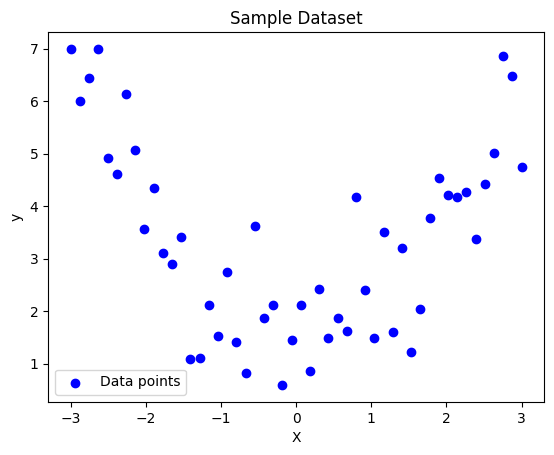

In [ ]:
plt.scatter(X, y, color="blue", label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample Dataset")
plt.legend()
plt.show()

## **Custom Polynomial Regression**

In [ ]:
# Here the input feature X is converted into polynomial features (high degree)
# Ex. X = [x] after applying this function degree=2 --> [1, x, x^2]

def create_polynomial_feature(X, degree):
  # make it column vector
  X = X.reshape(-1, 1)

  # generating bias term (1's)
  features = [np.ones_like(X)]

  # Appending polynomial features
  for d in range(1, degree+1):
    features.append(X**d)

  # returning the X with added polynomial features
  return np.hstack(features)

In [ ]:
# Example: Create polynomial features of degree 2
X_poly = create_polynomial_feature(X, degree=2)
print("Shape oof original features:", X.shape)
print("Shape of polynomial features:", X_poly.shape)
print("First 5 rows:\n", X_poly[:5])

Shape oof original features: (50,)
Shape of polynomial features: (50, 3)
First 5 rows:
 [[ 1.         -3.          9.        ]
 [ 1.         -2.87755102  8.28029988]
 [ 1.         -2.75510204  7.59058726]
 [ 1.         -2.63265306  6.93086214]
 [ 1.         -2.51020408  6.30112453]]


In [ ]:
def fit_polynomial_regression(X, y, degree):

  # Create polynomial features from the input data
  X_poly = create_polynomial_feature(X, degree)

  # Calculate the parameters (theta) using the normal equation: theta = (X_poly^T * X_poly)^-1 * X_poly^T * y
  # This eaquation is also used in Simple and Multiple linear Regression
  # This formula finds the values of theta that minimize the sum of squared differences between the actual and predicted values.
  theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

  return theta

In [ ]:
# Train polynomial regression of degree 2
theta = fit_polynomial_regression(X, y, degree=2)
print("Learned Parameters (theta):", theta)

Learned Parameters (theta): [ 1.58877787 -0.096639    0.55948799]


In [ ]:
def predict(X, theta, degree):
  # Create polynomial features for the input data
  X_poly = create_polynomial_feature(X, degree)
  # Calculate the predicted values using the formula: y_pred = X_poly * theta
  return X_poly.dot(theta)

In [ ]:
# Predictions
y_pred = predict(X, theta, degree=2)

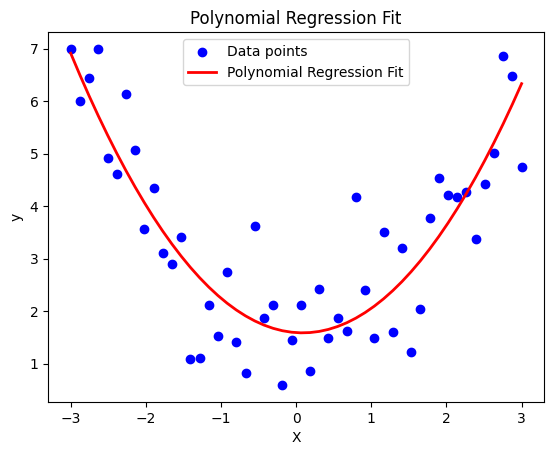

In [ ]:
# Plot results
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", linewidth=2, label="Polynomial Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()

## **Effect of Degree or Alpha**

### **The Importance of Degree**

The **degree** is a crucial parameter in polynomial regression. It determines the shape and complexity of the curve that the model fits to your data.

*   **What is Degree?**
    *   It's the highest power of the independent variable (X) in the polynomial equation.
  

*   **Increasing the Degree:**
    *   A higher degree allows the model to fit more complex, curved patterns in the data.
    *   It can potentially lead to a better fit on the training data.
    *   However, increasing the degree too much can lead to **overfitting**. This means the model fits the training data very well but performs poorly on new, unseen data because it has captured the noise in the training data rather than the underlying trend.

*   **Decreasing the Degree:**
    *   A lower degree results in a simpler model, closer to a straight line.
    *   It reduces the risk of overfitting.
    *   However, if the true relationship between variables is highly non-linear, a low-degree polynomial might **underfit** the data, meaning it doesn't capture the pattern well and results in inaccurate predictions.

*   **Choosing the Right Degree:**
    *   Selecting the appropriate degree is a balance between fitting the data well and avoiding overfitting.
    *   This often involves experimenting with different degrees and evaluating the model's performance on a separate validation set.

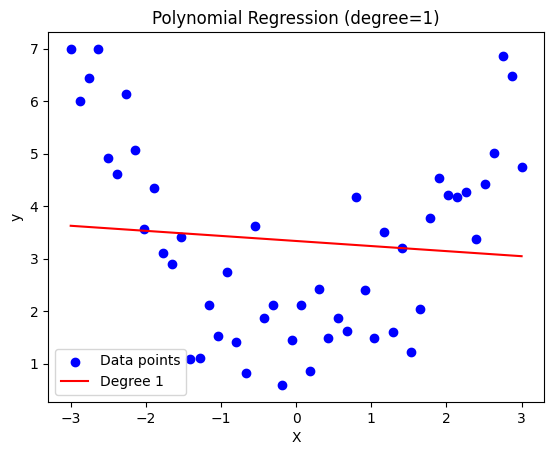

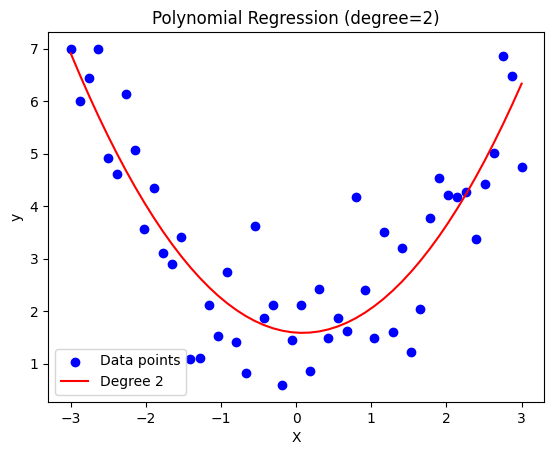

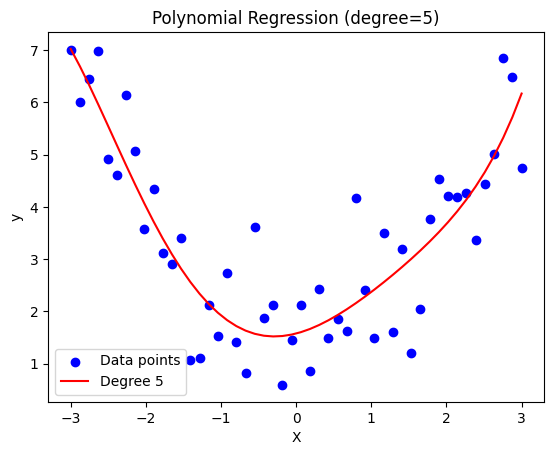

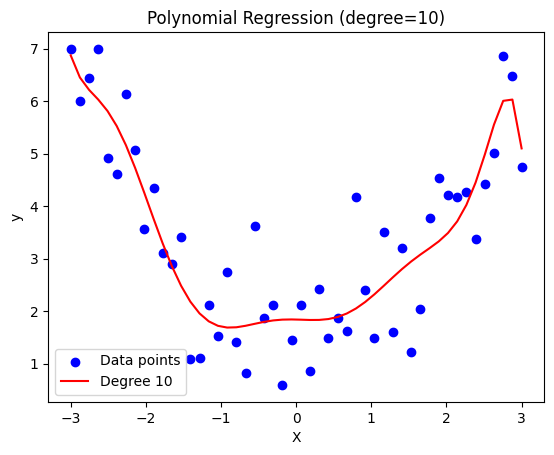

In [ ]:
for degree in [1, 2, 5, 10]:
    theta = fit_polynomial_regression(X, y, degree)
    y_pred = predict(X, theta, degree)

    plt.scatter(X, y, color="blue", label="Data points")
    plt.plot(X, y_pred, color="red", label=f"Degree {degree}")
    plt.title(f"Polynomial Regression (degree={degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()